In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from analysis import make_barplot

In [2]:
data = pd.read_csv('MapFileData-WithCountyResultsAndCovariates.csv')
national_data = pd.read_csv('national_data.csv')

for r in ['Black', 'White', 'Hispanic']:
    data['m.RR_{}_Unarmed_Versus_Armed'.format(r)] = 1. / data['m.RR_Black_Armed_Versus_Unarmed'.format(r)]
    national_data['m.RR_{}_Unarmed_Versus_Armed'.format(r)] = 1. / national_data['m.RR_Black_Armed_Versus_Unarmed'.format(r)]

counties = ['Alameda', 'San Francisco', 'Contra Costa', 'Santa Clara']

In [3]:
individual_idxs = [data['county'] == c for c in counties]
local_idxs = individual_idxs[0]
for idxs in individual_idxs[1:]:
    local_idxs = np.logical_or(local_idxs, idxs)
    
local_data = data.loc[local_idxs]

In [4]:
median_cols = [c for c in local_data.columns if (('m.' in c or 'county' in c) and 'log' not in c)]

local_median_data = local_data[median_cols]

# Armed vs. Armed

In [5]:
features = ['m.RR_Black_Armed_Versus_White_Armed', 'm.RR_Hispanic_Armed_Versus_White_Armed']
county = 'Alameda'

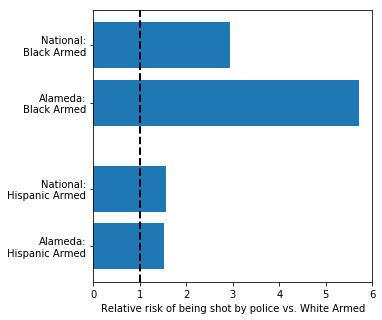

In [6]:
plt.close()
f, ax = plt.subplots(1, figsize=(5, 5))

make_barplot(national_data, local_median_data, county, features, ax)

# Unarmed vs. Armed

In [7]:
features = ['m.RR_Black_Unarmed_Versus_White_Armed',
            'm.RR_Hispanic_Unarmed_Versus_White_Armed',
            'm.RR_White_Unarmed_Versus_Armed']
county = 'Alameda'

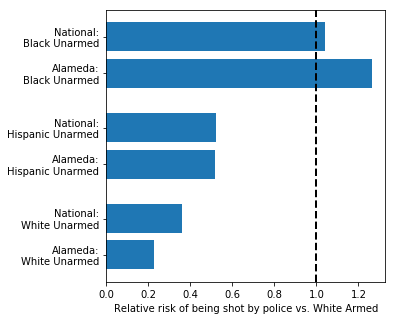

In [8]:
plt.close()
f, ax = plt.subplots(1, figsize=(5, 5))

make_barplot(national_data, local_median_data, county, features, ax)

# Unarmed vs. Unarmed

In [9]:
features = ['m.RR_Black_Unarmed_Versus_White_Unarmed', 'm.RR_Hispanic_Unarmed_Versus_White_Unarmed']
county = 'Alameda'

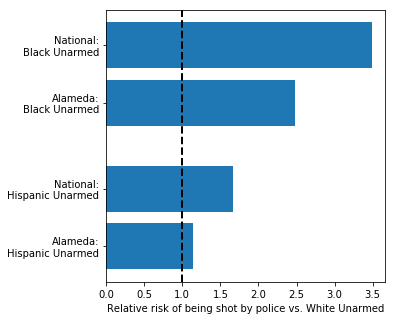

In [10]:
plt.close()
f, ax = plt.subplots(1, figsize=(5, 5))

make_barplot(national_data, local_median_data, county, features, ax)